# Import packages

In [1]:
import __init__  # noqa: F401
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.core.display import HTML
from IPython.display import display

from scripts.data import Modeling
from scripts.main import main
from scripts.plotting import check_interaction, plot_data_agg, plot_in_range

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_colwidth', None)

display(HTML('<style>.container { width:60% !important; }</style>'))

# Load and preprocess data

In [2]:
df_modeling = main()

INFO:root:20241013134657: function: _load_data, df shape: (678013, 12)
INFO:root:20241013134657: function: cast_cols_to_int, df shape: (678013, 12)
INFO:root:20241013134658: function: remove_char_from_cols, df shape: (678013, 12)
INFO:root:20241013134658: function: _kupierung, df shape: (678013, 12)
INFO:root:20241013134658: function: _kupierung, df shape: (678013, 12)
INFO:root:20241013134658: function: _kupierung, df shape: (678013, 12)
INFO:root:20241013134658: function: main, df shape: (678013, 12)
INFO:root:20241013134710: function: _load_data, df shape: (26639, 2)
INFO:root:20241013134710: function: cast_cols_to_int, df shape: (26639, 2)
INFO:root:20241013134710: function: _group_claims_by_policy_id, df shape: (24950, 2)
Number of claims above kupierung threshold 50000: 
94 out of 24950. 
Reset them to 50000. 
Applied factor 1.3354896937210312. 

Number of claims above kupierung threshold 50000: 
32 out of 24950. 
Reset them to 50000. 
Applied factor 1.0039093452026402. 

Number 

# Observed burning cost, frequency and severity

<Axes: xlabel='burning_cost'>

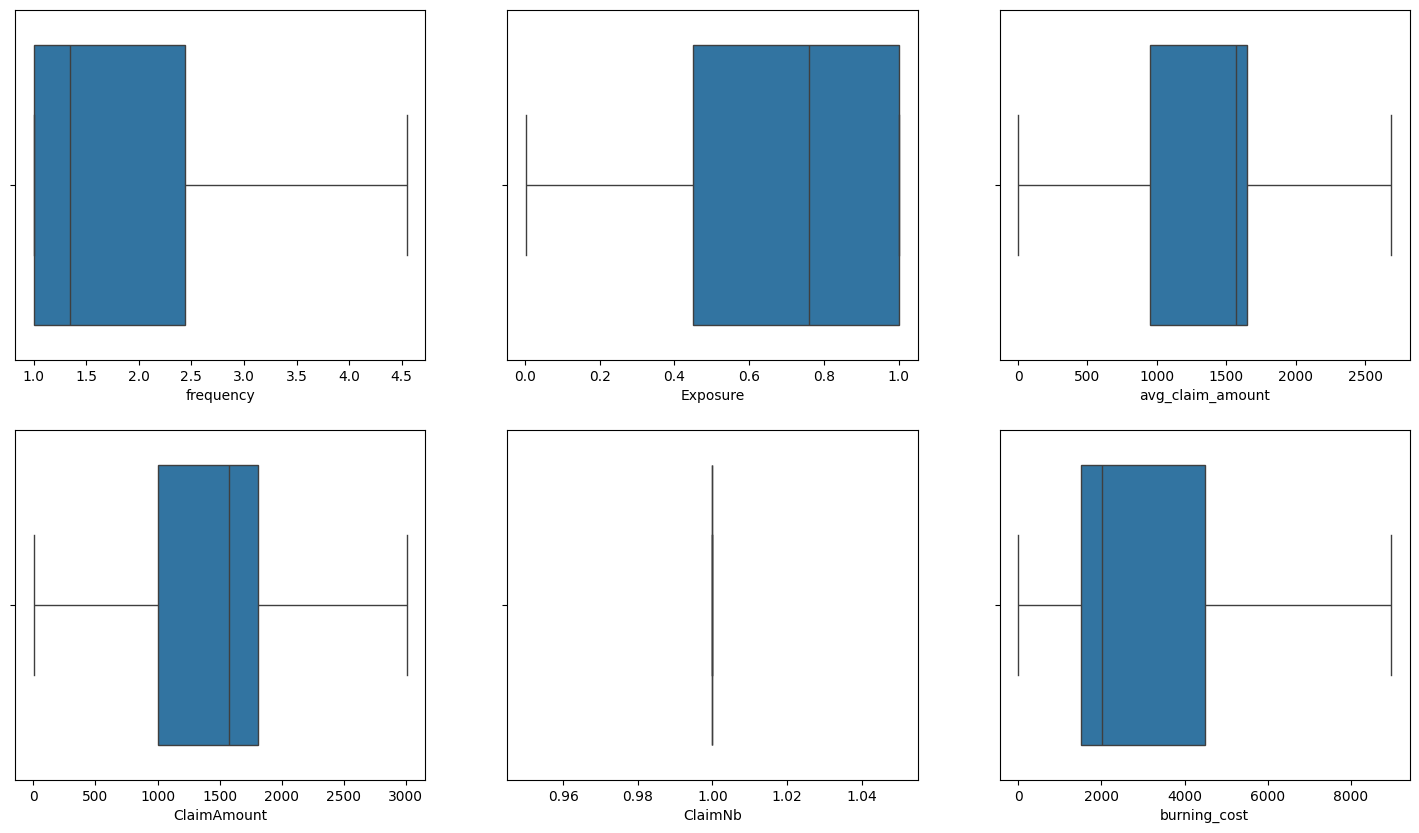

In [3]:
df = df_modeling.loc[df_modeling[Modeling.frequency] > 0]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.boxplot(x=df[Modeling.frequency], showfliers=False, ax=axes[0, 0])
sns.boxplot(x=df[Modeling.exposure], showfliers=False, ax=axes[0, 1])
sns.boxplot(x=df[Modeling.avg_claim_amount], showfliers=False, ax=axes[0, 2])
sns.boxplot(x=df[Modeling.claim_amount], showfliers=False, ax=axes[1, 0])
sns.boxplot(x=df[Modeling.claim_nb], showfliers=False, ax=axes[1, 1])
sns.boxplot(x=df[Modeling.burning_cost], showfliers=False, ax=axes[1, 2])

## Histogram

### Frequency

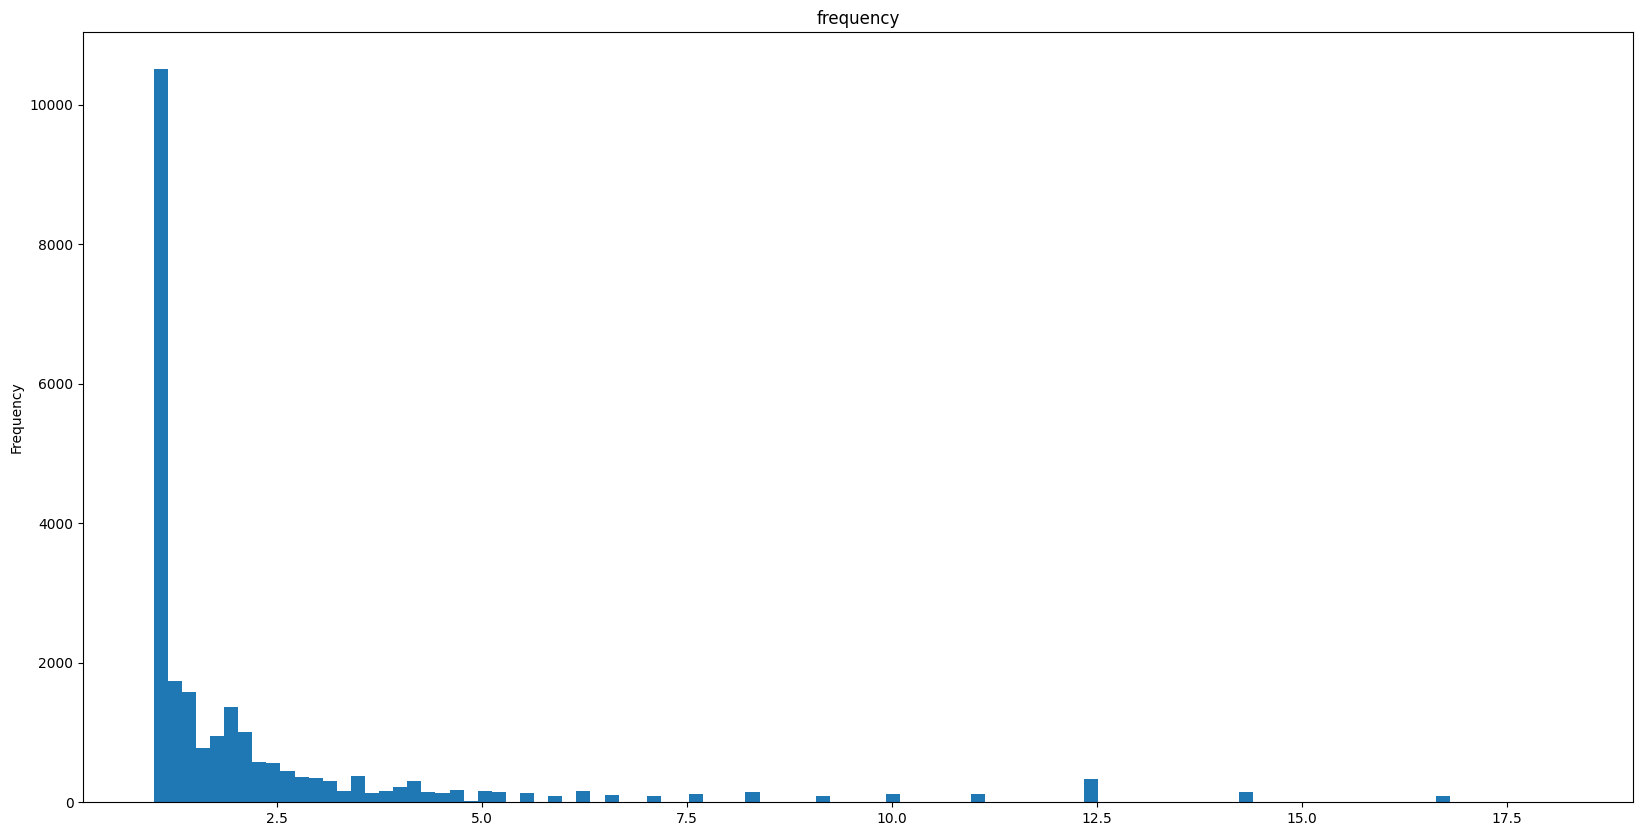

In [4]:
col = Modeling.frequency
range_cs = (0, 20)

plot_in_range(df_modeling=df_modeling, col=col, range_cs=range_cs)

### Exposure

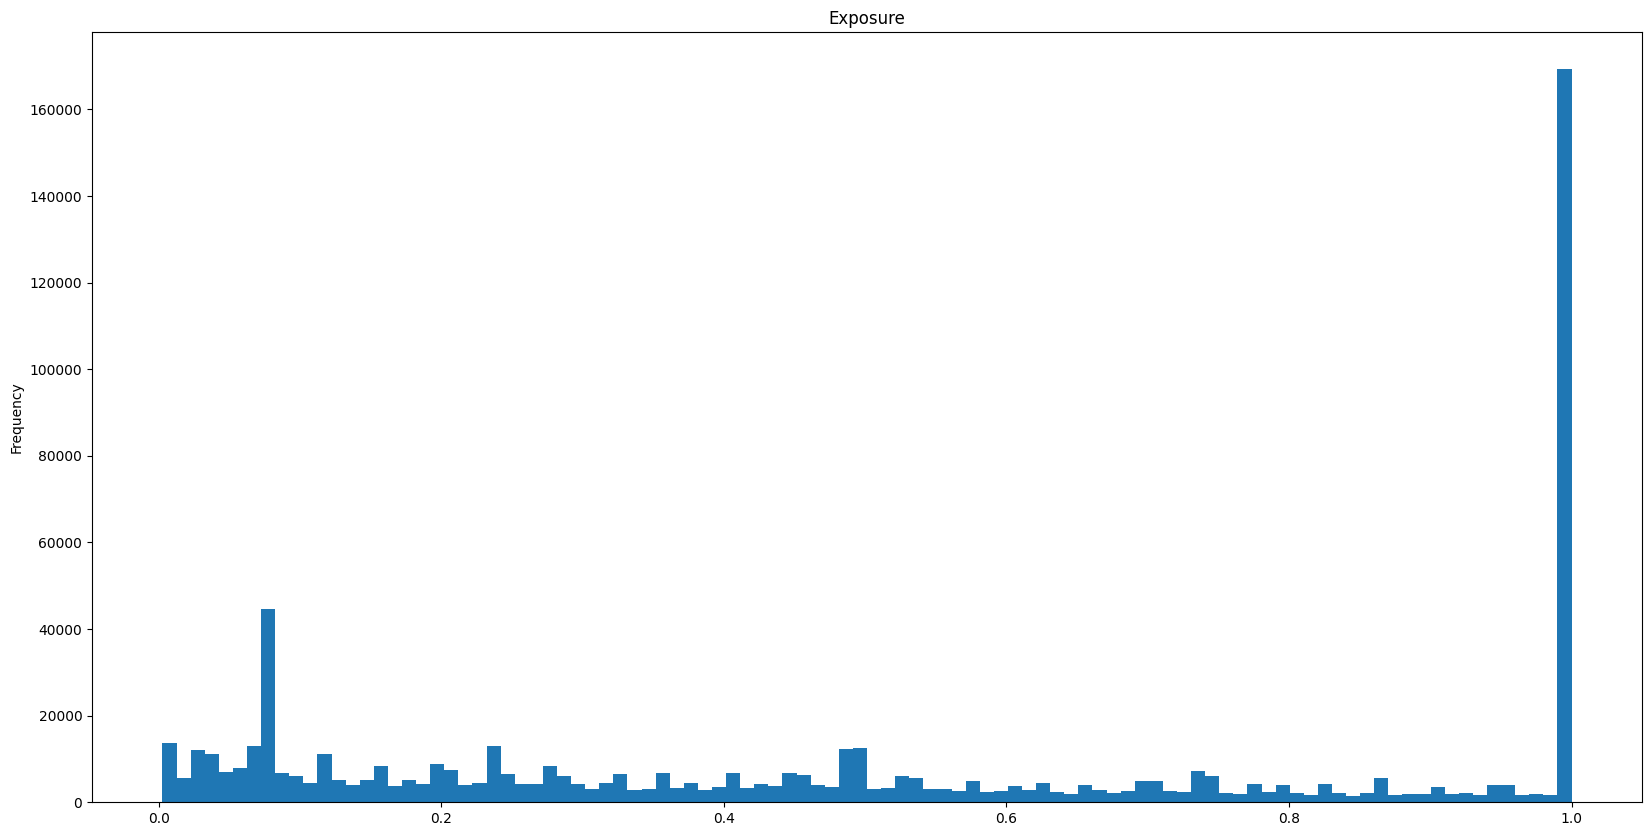

In [5]:
col = Modeling.exposure
range_cs = (0, 2)

plot_in_range(df_modeling=df_modeling, col=col, range_cs=range_cs)

### Average claim amount

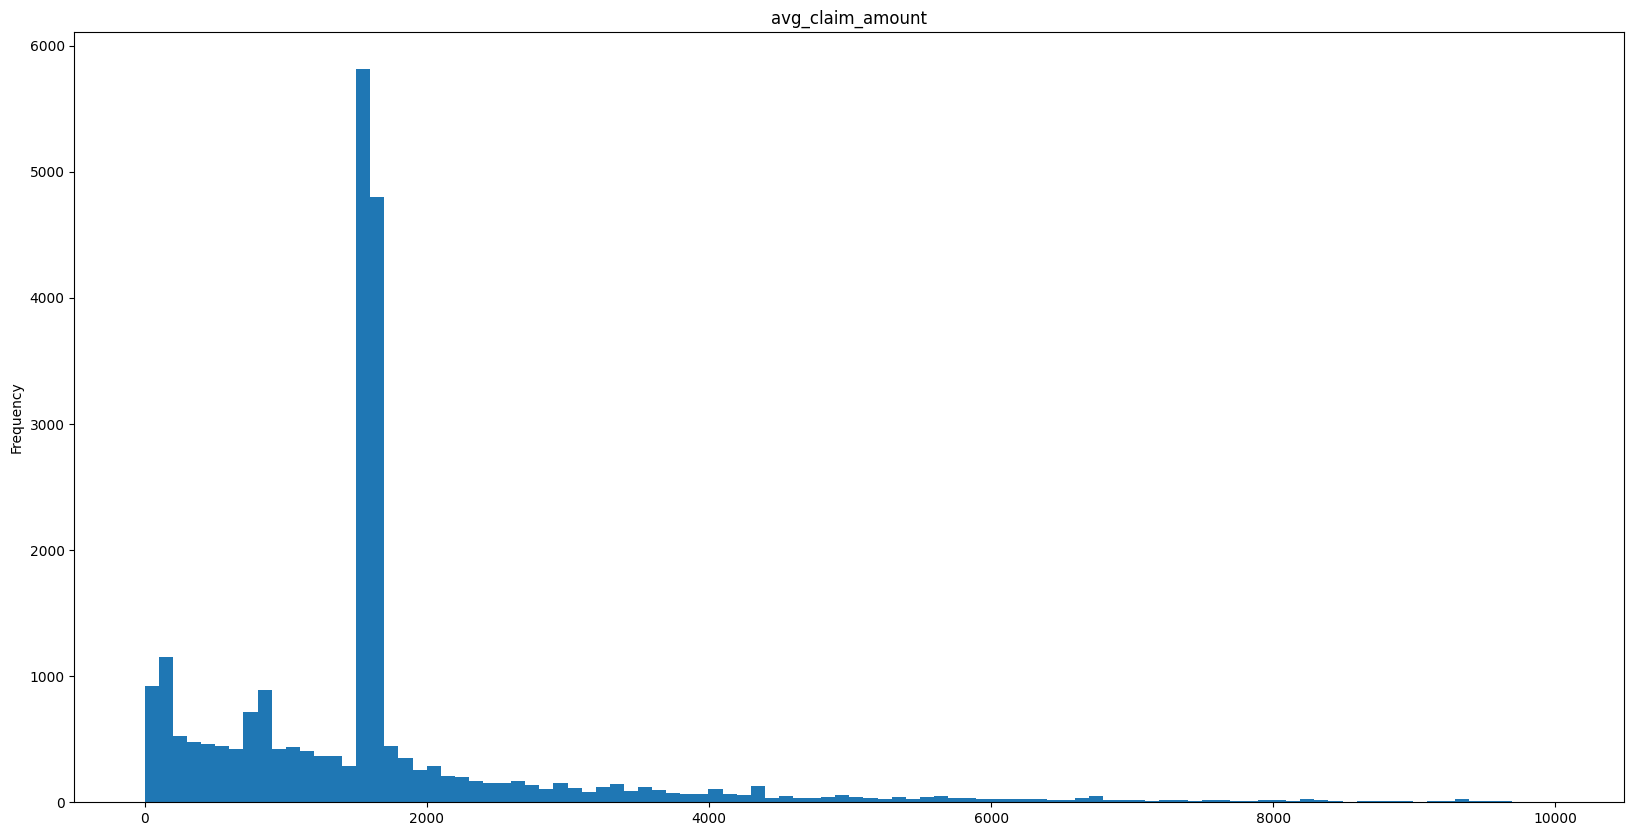

In [6]:
col = Modeling.avg_claim_amount
range_cs = (0, 10_000)

plot_in_range(df_modeling=df_modeling, col=col, range_cs=range_cs)

### Claim amount

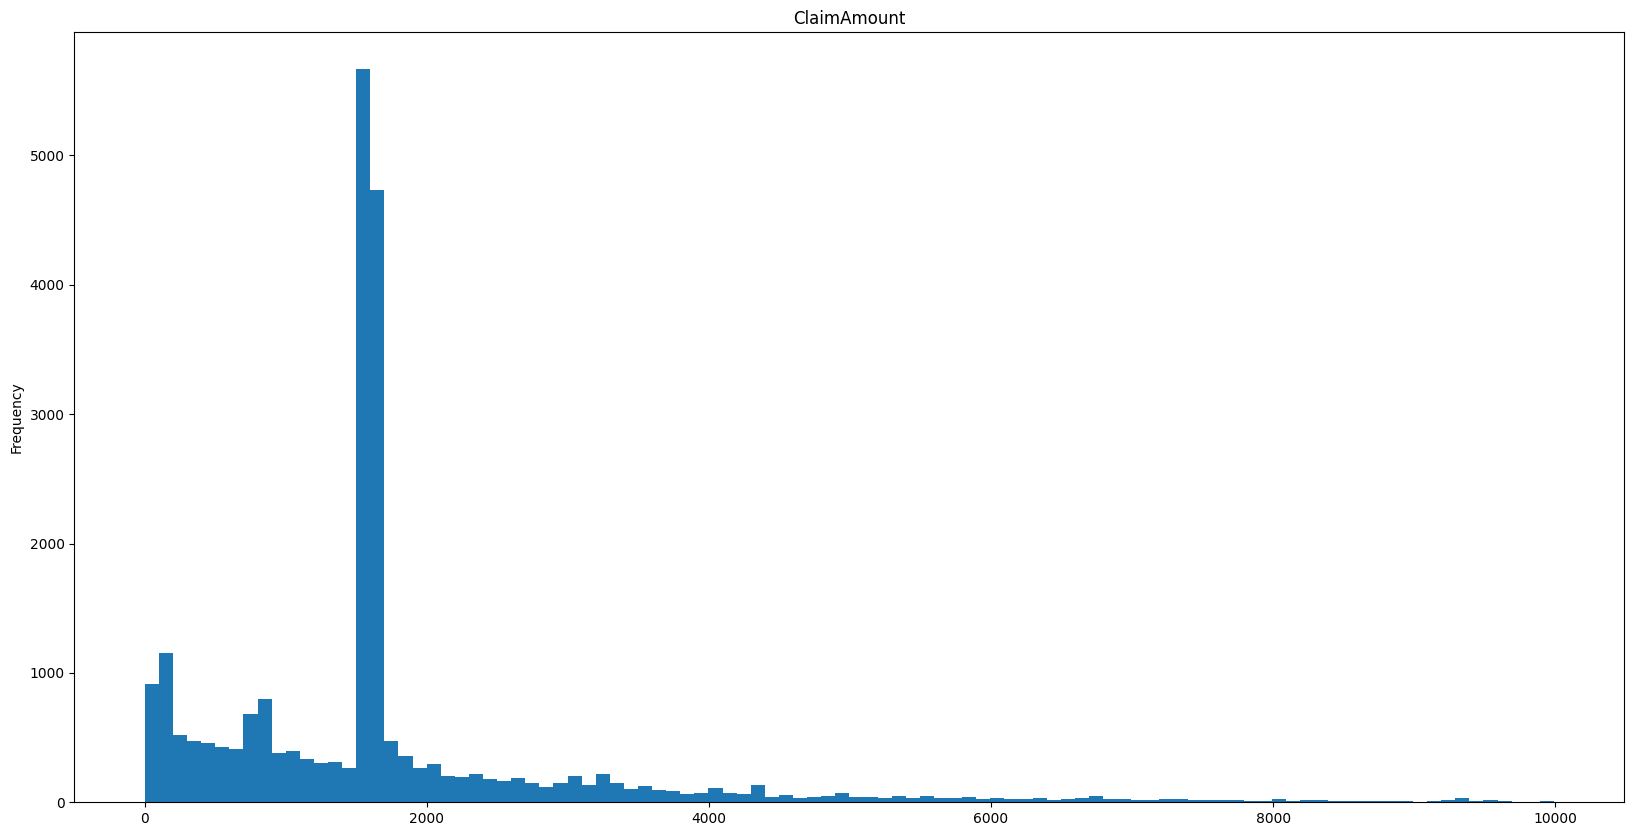

In [7]:
col = Modeling.claim_amount
range_cs = (0, 10_000)

plot_in_range(df_modeling=df_modeling, col=col, range_cs=range_cs)

### Claim number

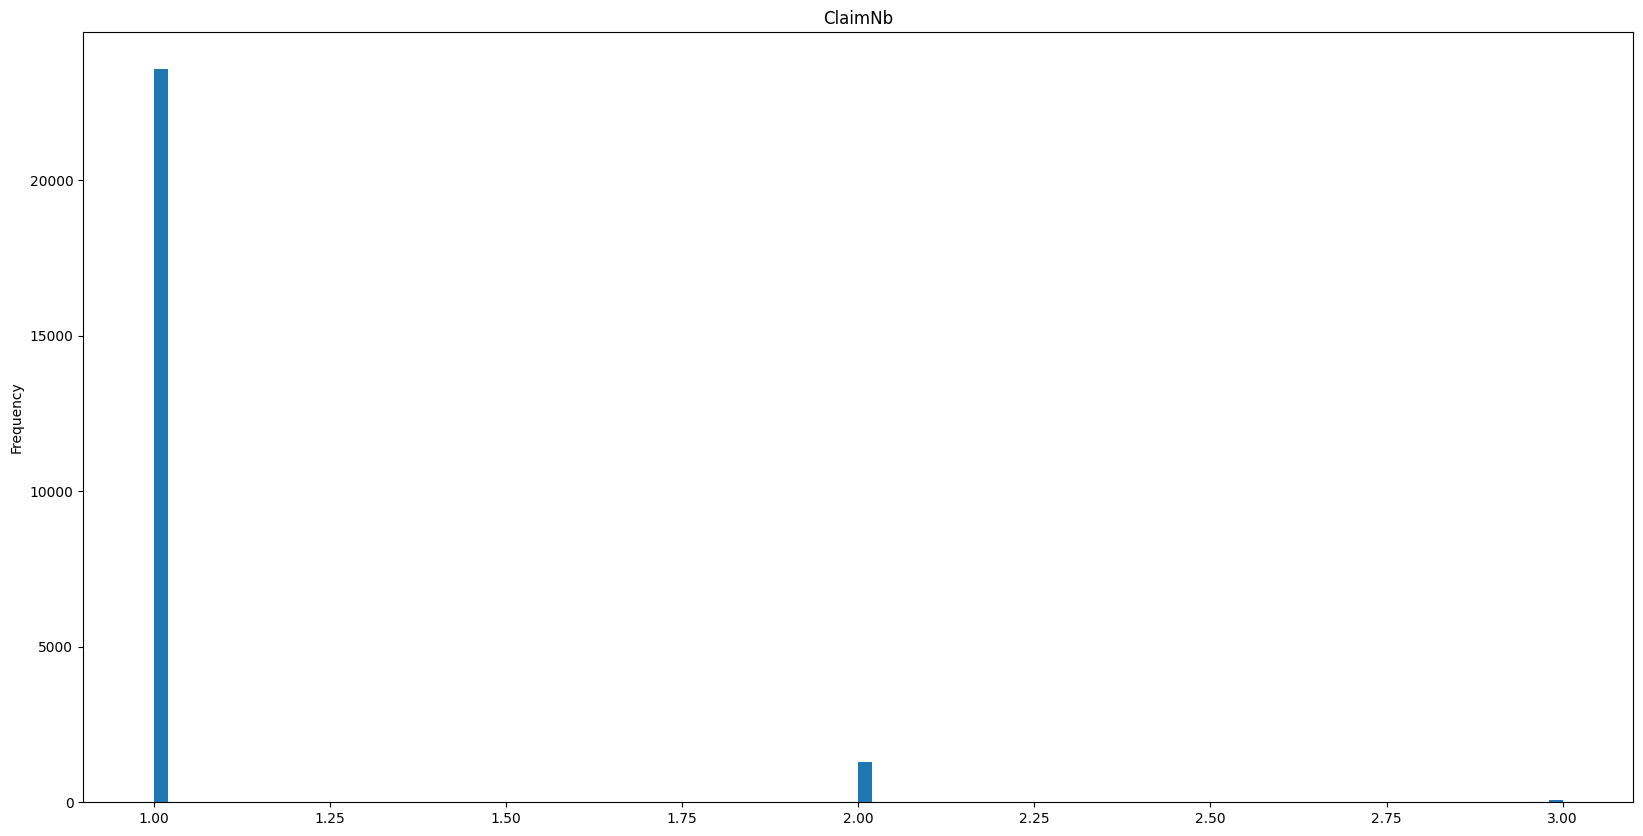

In [8]:
col = Modeling.claim_nb
range_cs = (0, 10)

plot_in_range(df_modeling=df_modeling, col=col, range_cs=range_cs)

### Burning cost

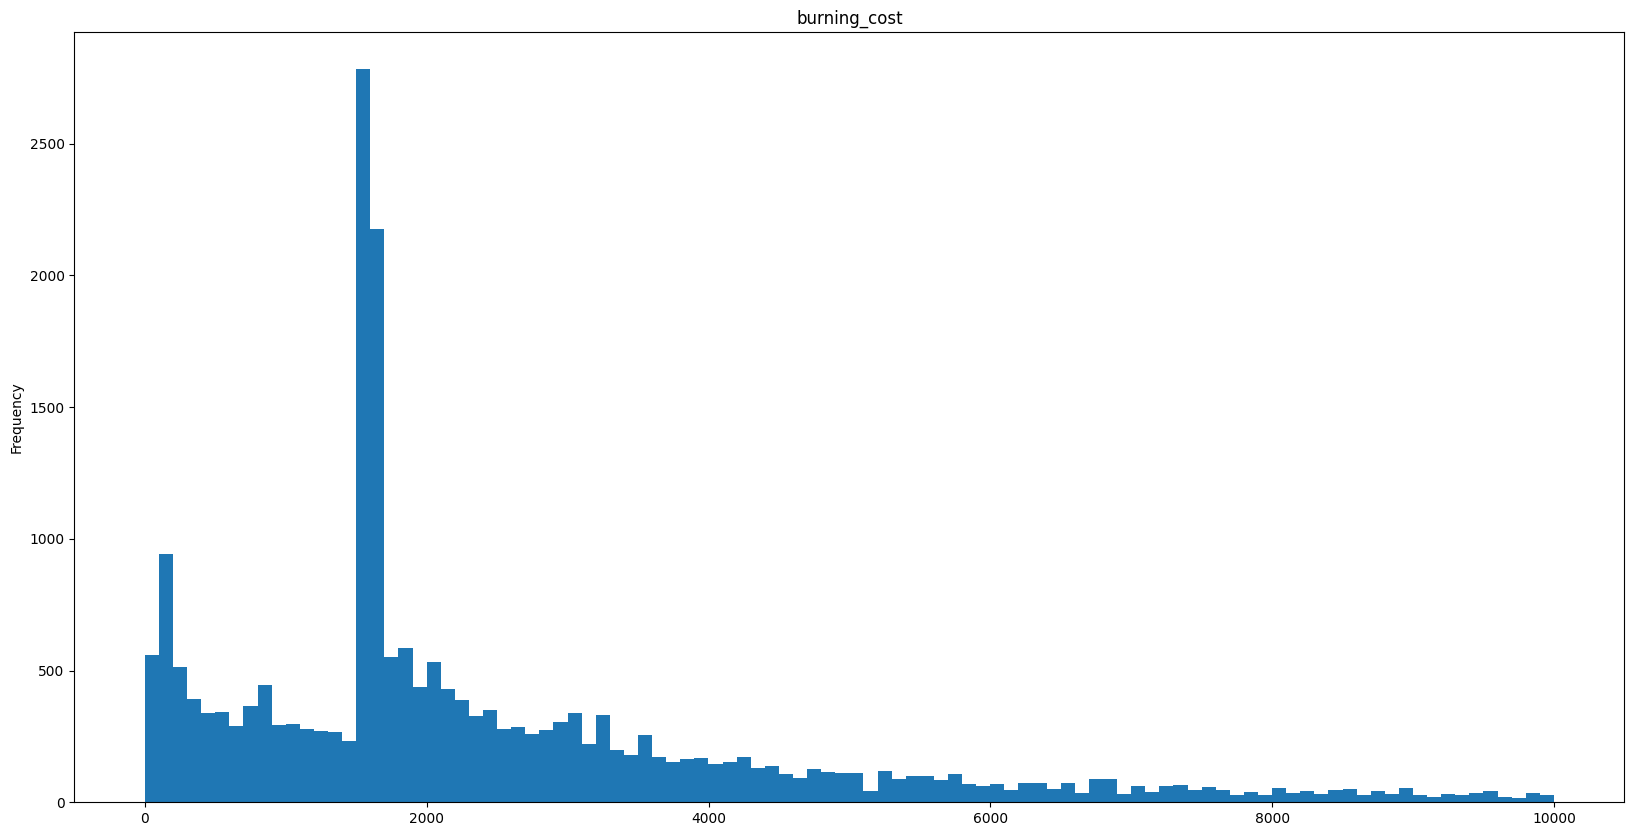

In [9]:
col = Modeling.burning_cost
range_cs = (0, 10_000)

plot_in_range(df_modeling=df_modeling, col=col, range_cs=range_cs)

## feature plot

INFO:root:feature: Area


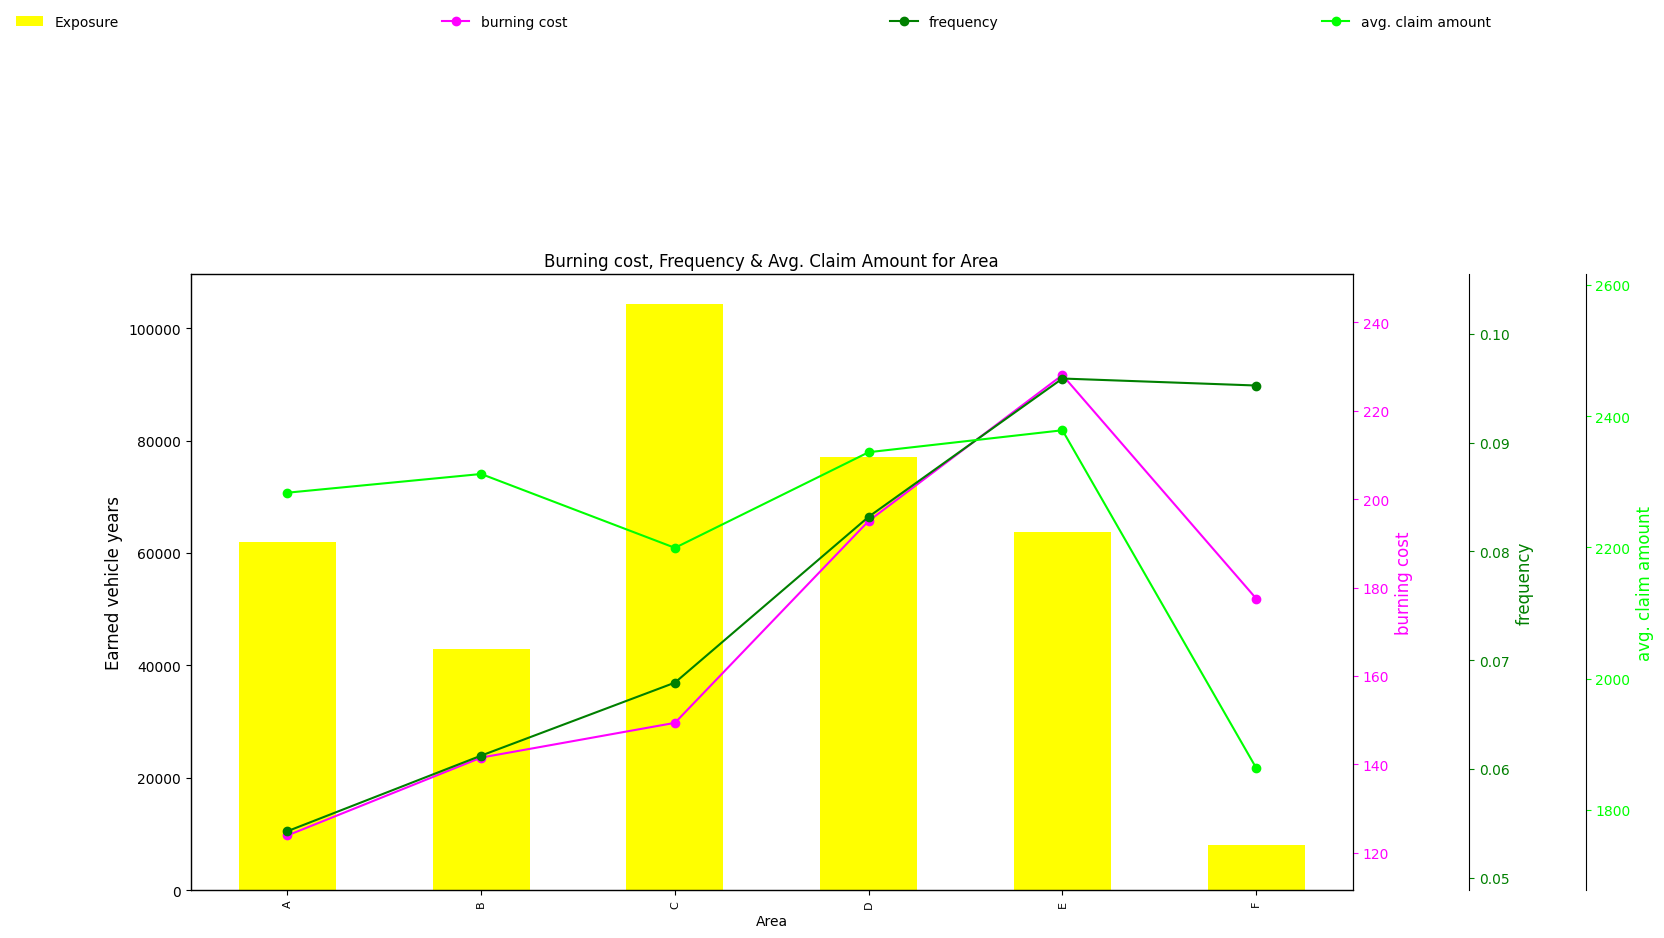

INFO:root:feature: bonus_malus_grouped


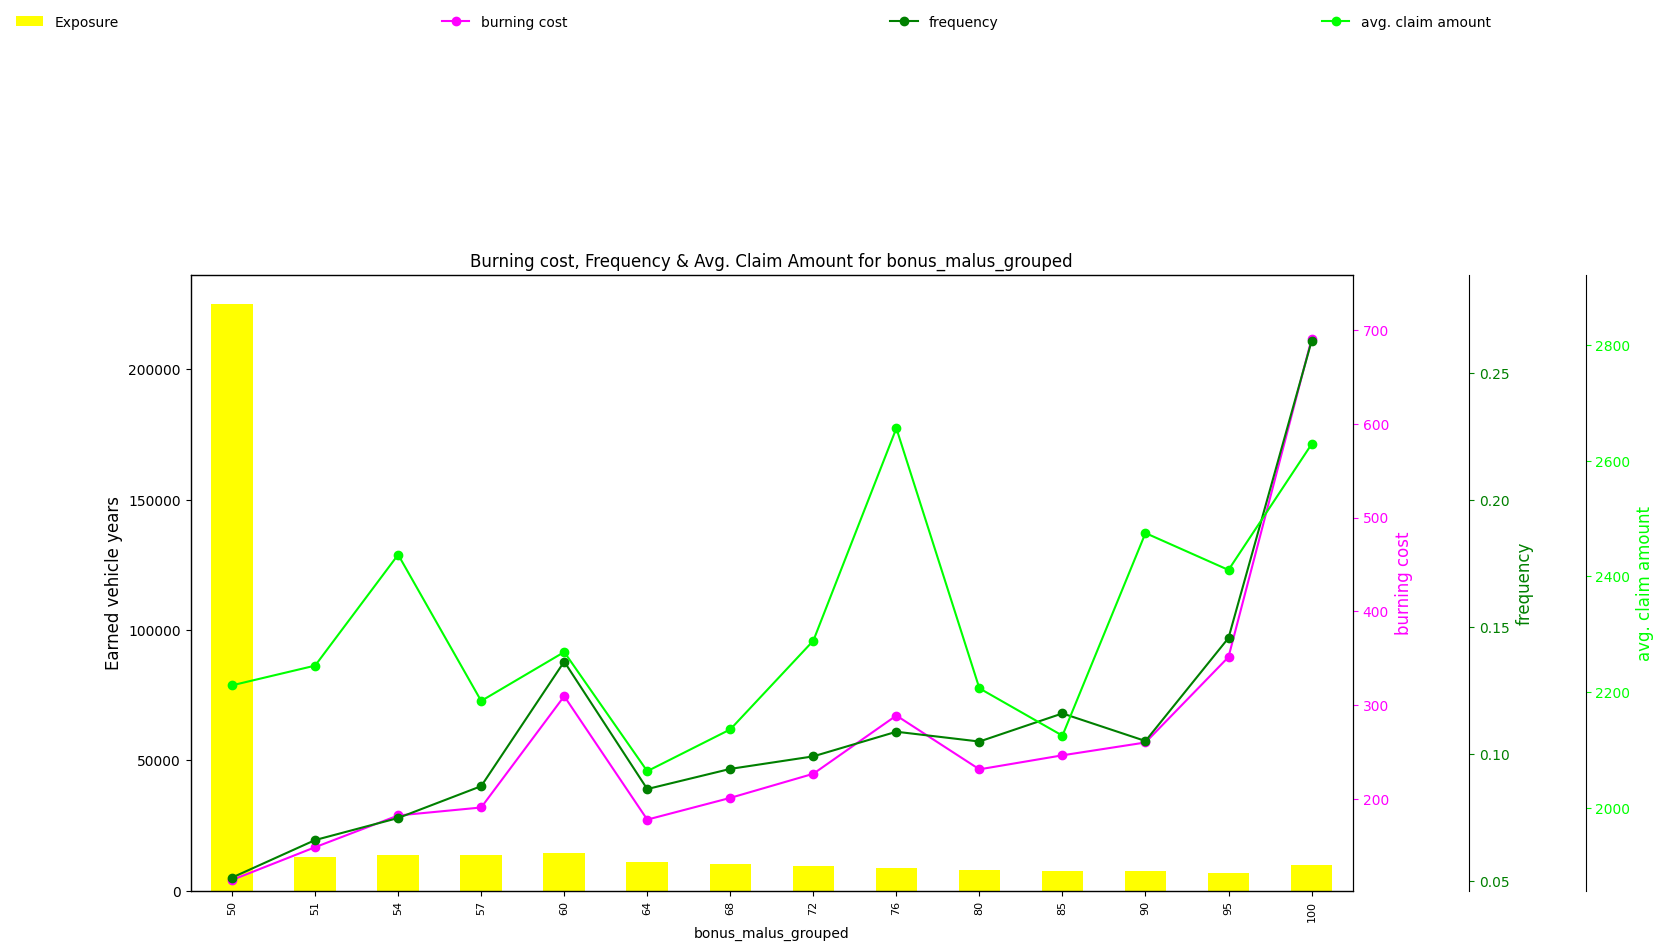

INFO:root:feature: density_grouped


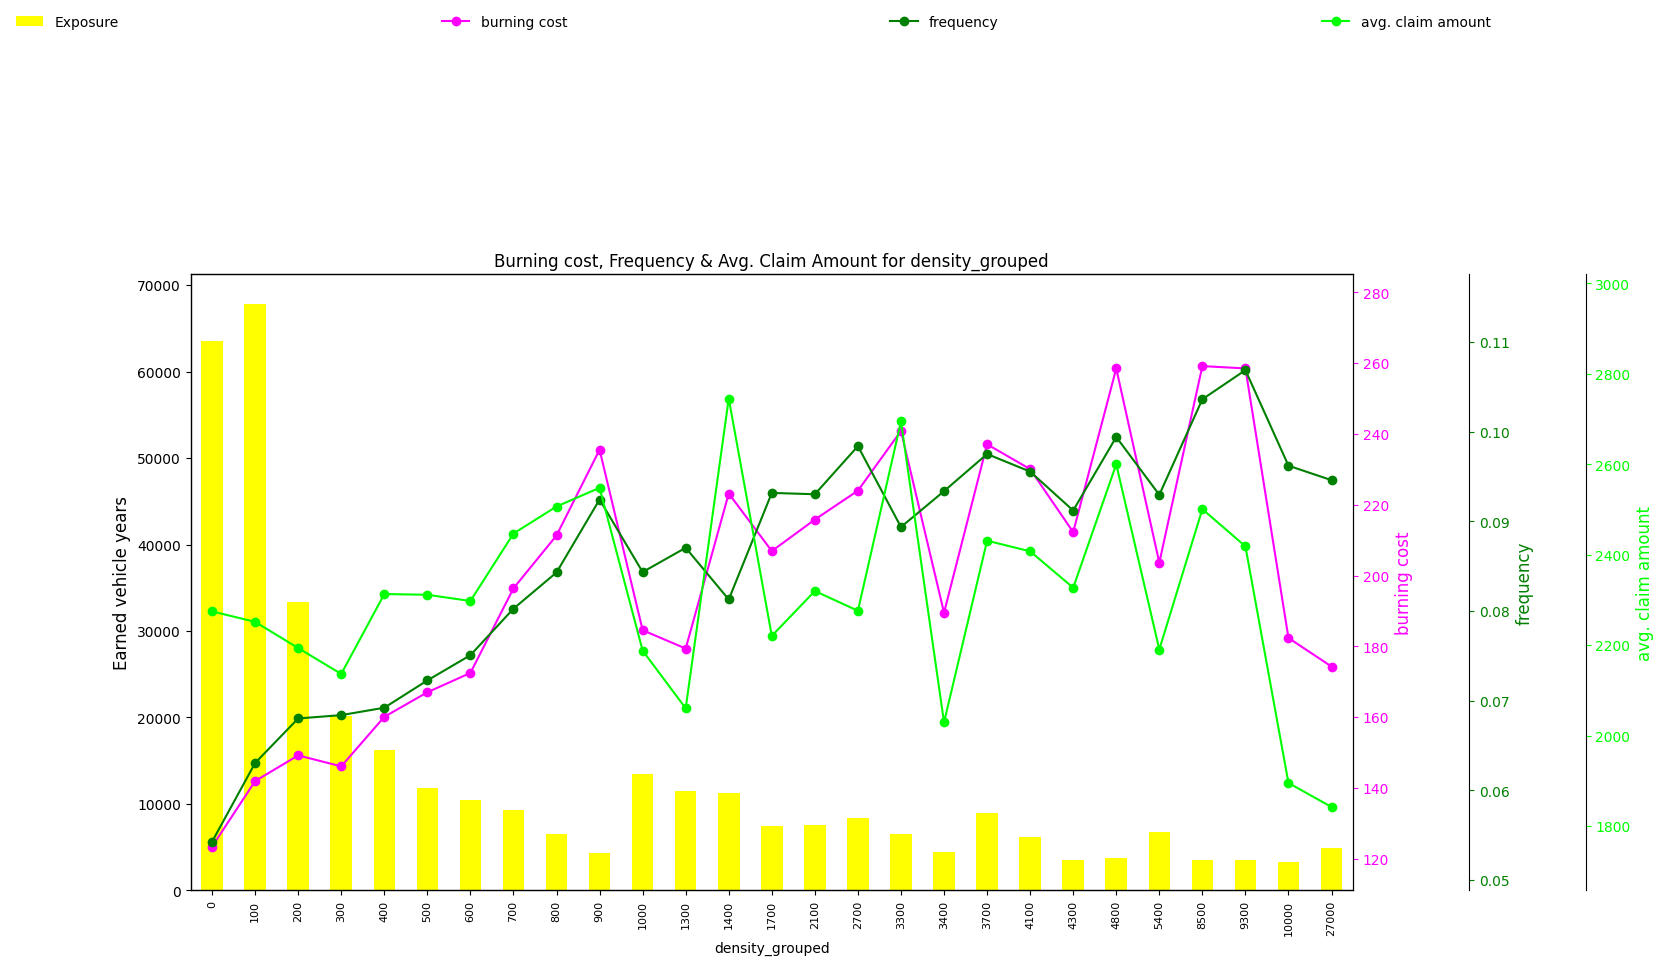

INFO:root:feature: DrivAge


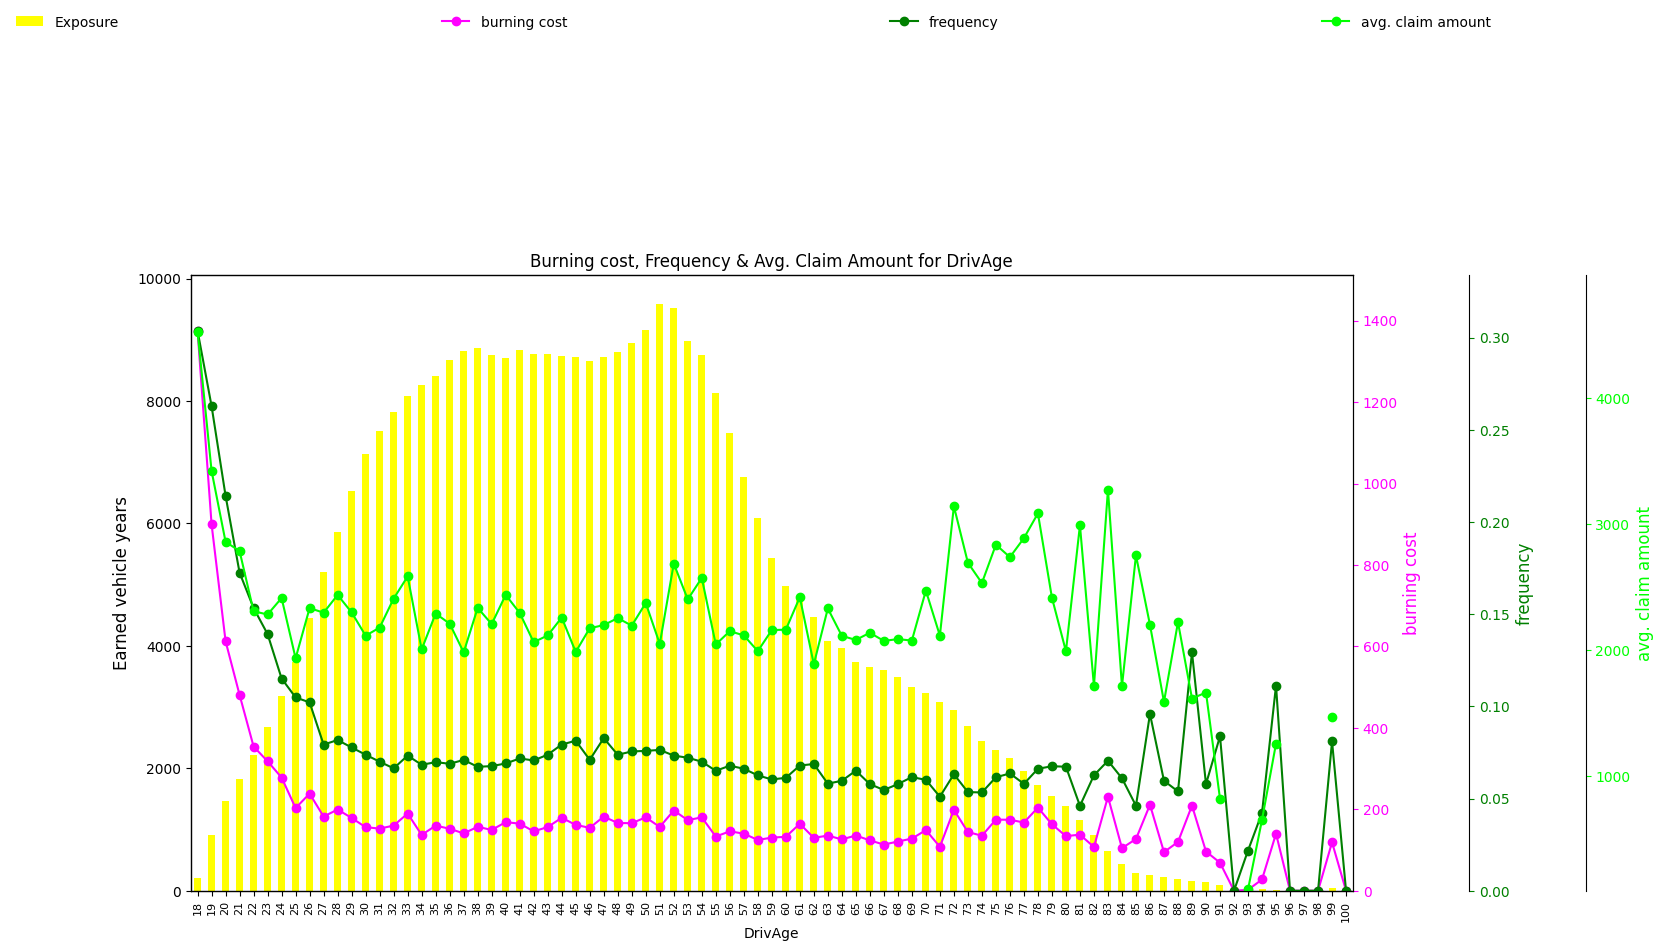

INFO:root:feature: Region


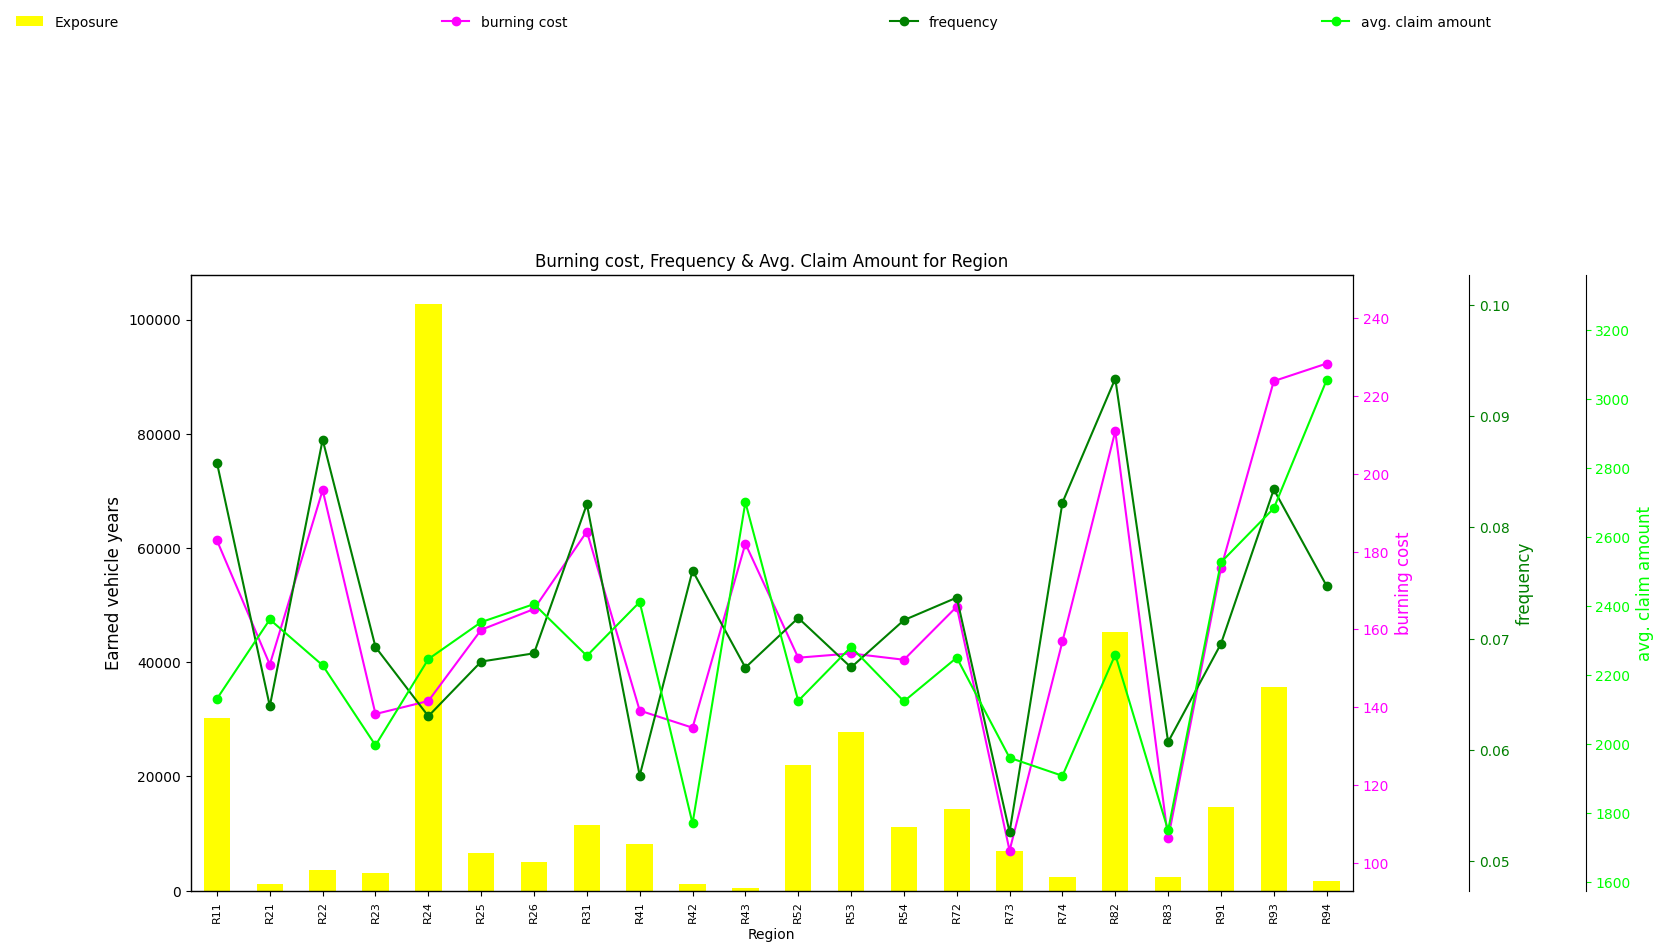

INFO:root:feature: VehAge


INFO:root:feature: VehBrand


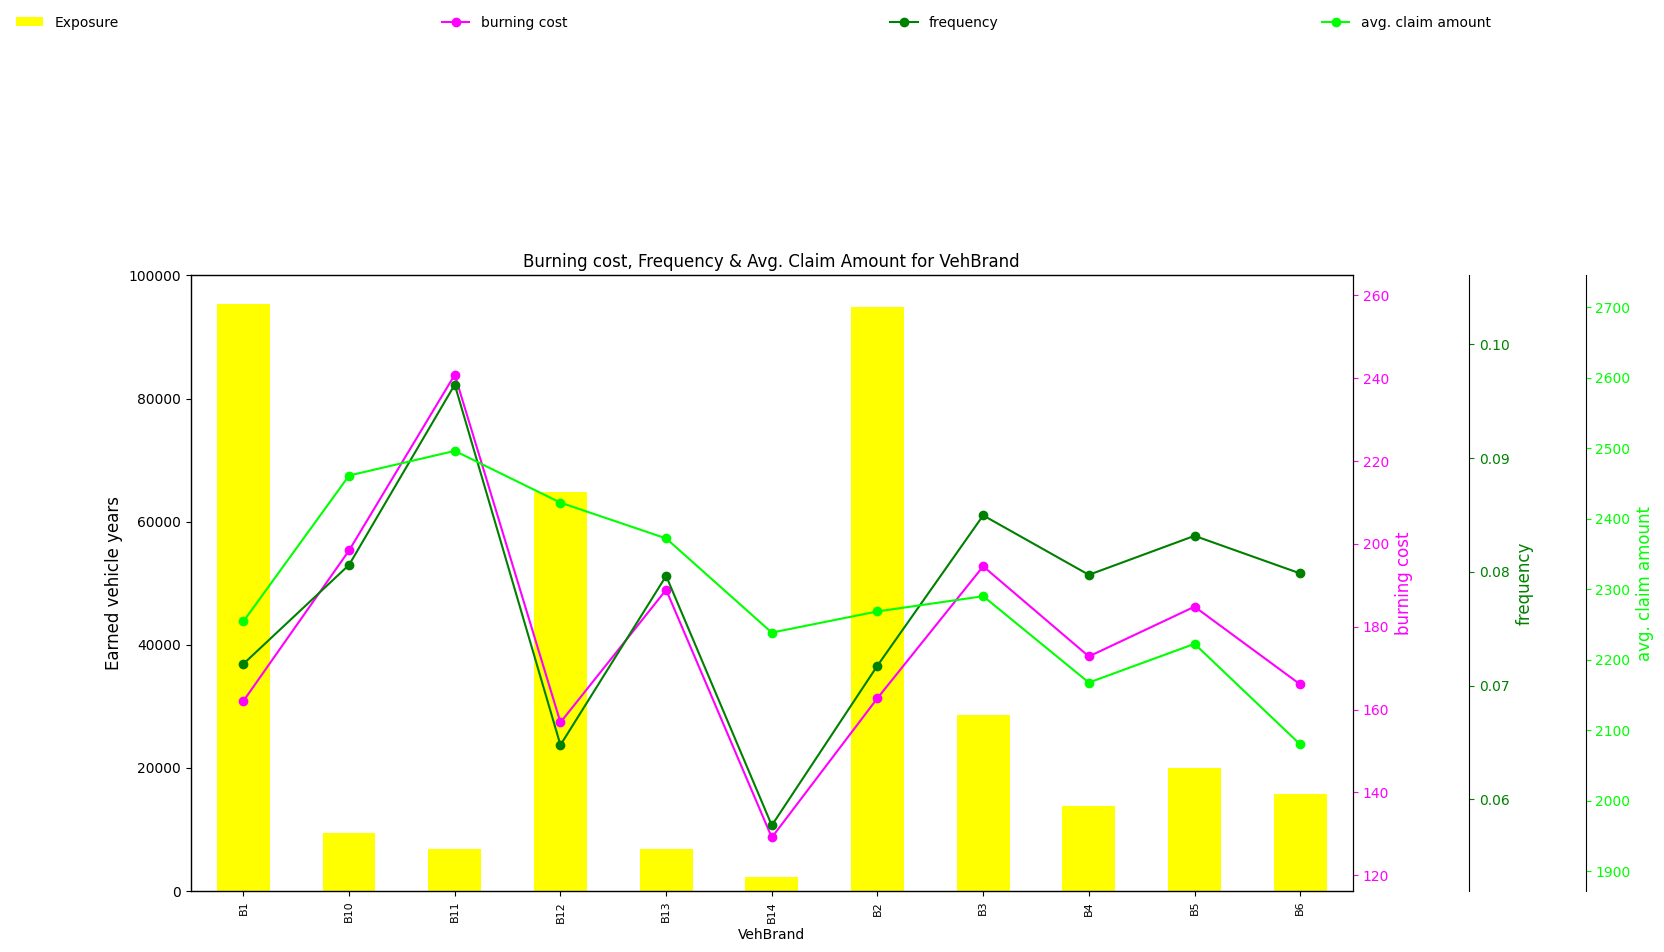

INFO:root:feature: VehGas


INFO:root:feature: VehPower


INFO:root:feature: veh_power_x_veh_gas


INFO:root:feature: veh_power_x_young_driver_flag


INFO:root:feature: young_driver_flag


In [10]:
cols = [
    Modeling.area,
    Modeling.bonus_malus_grouped,
    Modeling.density_grouped,
    Modeling.driv_age,
    Modeling.region,
    Modeling.veh_age,
    Modeling.veh_brand,
    Modeling.veh_gas,
    Modeling.veh_power,
    Modeling.veh_power_x_veh_gas,
    Modeling.veh_power_x_young_driver_flag,
    Modeling.young_driver_flag,
]

plot_data_agg(
    df_input=df_modeling,
    columns=cols,
    feature_y=Modeling.exposure,
    feature_y_agg='sum',
    feature_y_name='Earned vehicle years',
    feature_z1=(Modeling.claim_amount, Modeling.exposure),
    feature_z1_name='burning cost',
    feature_z1_agg=('sum', 'sum'),
    feature_z1_ops='/',
    feature_z2=(Modeling.claim_nb, Modeling.exposure),
    feature_z2_name='frequency',
    feature_z2_agg=('sum', 'sum'),
    feature_z2_ops='/',
    feature_z3=(Modeling.claim_amount, Modeling.claim_nb),
    feature_z3_name='avg. claim amount',
    feature_z3_agg=('sum', 'sum'),
    feature_z3_ops='/',
    show_tables=False,
    sort_cols=False,
    chart_title='Burning cost, Frequency & Avg. Claim Amount',
    chart_size_horizontal=15,
    chart_size_vertical=8,
)

# check interactions

## vehicle power x vehicle fuel type

Exposure   ClaimAmount  ClaimNb  burning_cost  \
VehPower VehGas                                                       
4        Diesel   12791.524650  2.316618e+06      991    181.105694   
         Regular  47263.802654  6.610199e+06     2965    139.857532   
5        Diesel   33525.374714  6.115115e+06     2819    182.402584   
         Regular  34622.754107  4.941092e+06     2294    142.712276   
6        Diesel   54736.371817  1.023538e+07     4405    186.994067   
         Regular  27761.218355  4.420988e+06     1899    159.250510   
7        Diesel   35387.847825  5.997472e+06     2562    169.478306   
         Regular  42531.898876  6.965398e+06     3029    163.768800   
8        Diesel   15464.420100  2.456918e+06     1141    158.875505   
         Regular   7209.546206  1.258301e+06      505    174.532681   
9        Diesel    3494.517745  6.370728e+05      279    182.306365   
         Regular  11844.125911  2.196477e+06      941    185.448636   
10       Diesel    7469.855363  1.407972e+06      601    188.487125   
         Regular   7897.235461  1.541040e+06      616    195.136610   
11       Diesel    4339.558059  8.803820e+05      373    202.873643   
         Regular   4151.750393  7.645765e+05      341    184.157635   
12       Diesel    2643.651422  5.071982e+05      213    191.855188   
         Regular   1147.146921  3.104147e+05       83    270.597196   
13       Diesel     365.551180  5.100046e+04       30    139.516594   
         Regular   1271.484142  3.413194e+05      109    268.441719   
14       Diesel     142.258212  3.003391e+04       12    211.122532   
         Regular   1037.762179  2.462925e+05       89    237.330426   
15       Diesel     226.622040  4.097687e+04       20    180.815930   
         Regular   1033.827133  1.256940e+05       76    121.581264   

                  claim_frequency  avg_claim_amount  
VehPower VehGas                                      
4        Diesel          0.077473       2337.656865  
         Regular         0.062733       2229.409366  
5        Diesel          0.084086       2169.249726  
         Regular         0.066257       2153.919809  
6        Diesel          0.080477       2323.581565  
         Regular         0.068405       2328.061176  
7        Diesel          0.072398       2340.933837  
         Regular         0.071217       2299.570171  
8        Diesel          0.073782       2153.301968  
         Regular         0.070046       2491.685996  
9        Diesel          0.079839       2283.415156  
         Regular         0.079449       2334.194473  
10       Diesel          0.080457       2342.714748  
         Regular         0.078002       2501.687910  
11       Diesel          0.085953       2360.273332  
         Regular         0.082134       2242.159922  
12       Diesel          0.080570       2381.212396  
         Regular         0.072353       3739.936633  
13       Diesel          0.082068       1700.015188  
         Regular         0.085727       3131.370542  
14       Diesel          0.084354       2502.826153  
         Regular         0.085761       2767.331913  
15       Diesel          0.088253       2048.843745  
         Regular         0.073513       1653.868549

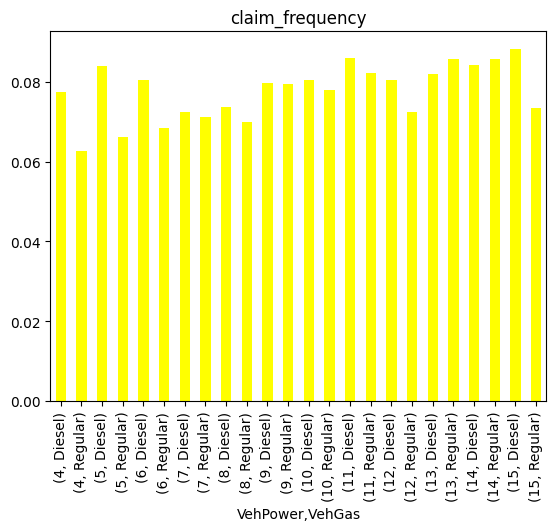

In [11]:
cols = [Modeling.veh_power, Modeling.veh_gas]

check_interaction(df_modeling=df_modeling, cols=cols)

Shows indication that for vehicle power lower 7 there is a difference between regular and diesel fuel type for burning cost and frequency.

## vehicle power x young driver flag

Exposure   ClaimAmount  ClaimNb  burning_cost  \
VehPower young_driver_flag                                                      
4        0                  57004.954970  7.940604e+06     3574    139.296737   
         1                   3050.372333  9.862125e+05      382    323.308896   
5        0                  65169.487793  9.926170e+06     4660    152.313149   
         1                   2978.641028  1.130037e+06      453    379.380087   
6        0                  79567.573476  1.331357e+07     5799    167.324004   
         1                   2930.016697  1.342800e+06      505    458.290888   
7        0                  75738.664248  1.176481e+07     5195    155.334221   
         1                   2181.082452  1.198064e+06      396    549.297943   
8        0                  22209.209476  3.493028e+06     1556    157.278339   
         1                    464.756829  2.221914e+05       90    478.080964   
9        0                  14858.566904  2.455106e+06     1115    165.231650   
         1                    480.076752  3.784443e+05      105    788.299578   
10       0                  15121.684286  2.854092e+06     1171    188.741660   
         1                    245.406538  9.491952e+04       46    386.784803   
11       0                   8426.598315  1.616615e+06      698    191.846645   
         1                     64.710137  2.834387e+04       16    438.012899   
12       0                   3755.425610  8.092921e+05      291    215.499439   
         1                     35.372732  8.320868e+03        5    235.233951   
13       0                   1622.306167  3.890284e+05      136    239.799629   
         1                     14.729156  3.291428e+03        3    223.463421   
14       0                   1153.694919  2.667587e+05       93    231.221186   
         1                     26.325472  9.567746e+03        8    363.440640   
15       0                   1243.048214  1.636387e+05       94    131.643087   
         1                     17.400959  3.032181e+03        2    174.253660   

                            claim_frequency  avg_claim_amount  
VehPower young_driver_flag                                     
4        0                         0.062696       2221.769505  
         1                         0.125231       2581.708148  
5        0                         0.071506       2130.079383  
         1                         0.152083       2494.563117  
6        0                         0.072881       2295.838078  
         1                         0.172354       2659.009808  
7        0                         0.068591       2264.640315  
         1                         0.181561       3025.414403  
8        0                         0.070061       2244.876337  
         1                         0.193650       2468.793256  
9        0                         0.075041       2201.888364  
         1                         0.218715       3604.231438  
10       0                         0.077438       2437.311526  
         1                         0.187444       2063.467811  
11       0                         0.082833       2316.066779  
         1                         0.247256       1771.492167  
12       0                         0.077488       2781.072555  
         1                         0.141352       1664.173512  
13       0                         0.083831       2860.503067  
         1                         0.203678       1097.142501  
14       0                         0.080611       2868.373201  
         1                         0.303888       1195.968299  
15       0                         0.075621       1740.837275  
         1                         0.114936       1516.090390

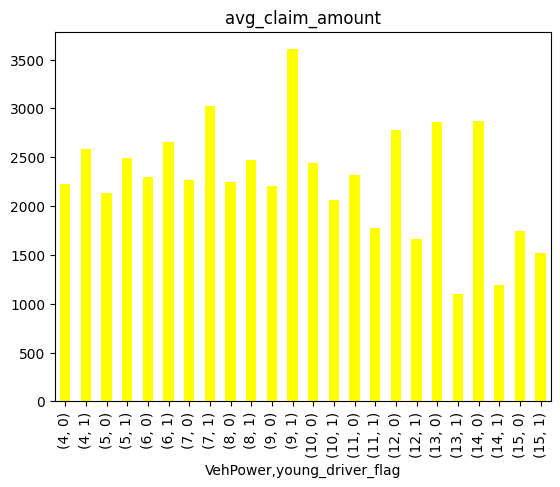

In [12]:
cols = [Modeling.veh_power, Modeling.young_driver_flag]

check_interaction(df_modeling=df_modeling, cols=cols)

Burning cost and frequency is rapidly increasing with vehicle power for young drivers lower than 25.
This is different behaviour compared to non-young driver.

# correlation matrix

In [13]:
cols = [
    Modeling.bonus_malus_grouped,
    Modeling.density_grouped,
    Modeling.exposure,
    Modeling.driv_age,
    Modeling.veh_age,
    Modeling.veh_power,
    Modeling.young_driver_flag,
    Modeling.veh_power_x_young_driver_flag,
    Modeling.veh_gas_encoded,
] + Modeling.VEH_BRAND_ENCODED

corr = df_modeling[cols].corr()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt='.2f')

<Axes: >

In [14]:
# le fin